In [1]:
#imorting libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

1.age
2.sex
3.chest pain type (4 values)
4.resting blood pressure
5.serum cholestoral in mg/dl
6.fasting blood sugar > 120 mg/dl
7.resting electrocardiographic results (values 0,1,2)
8.maximum heart rate achieved
9.exercise induced angina
10.oldpeak = ST depression induced by exercise relative to rest
11.the slope of the peak exercise ST segment
12.number of major vessels (0-3) colored by flourosopy
13.thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [2]:
data=pd.read_csv("C:/Recent Download/heart.csv")


In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.shape

(303, 14)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
#Missing values
data.isnull().any()


age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

There are no missing values in the dataset

<AxesSubplot:ylabel='target'>

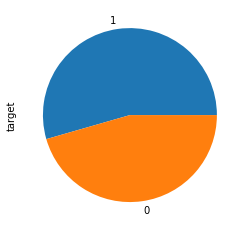

In [7]:
data['target'].value_counts().plot(kind='pie')

1= defective heart
0= healty heart
It seems that there are more numbers of defective heart here.

<AxesSubplot:ylabel='sex'>

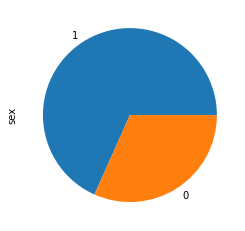

In [8]:
data['sex'].value_counts().plot(kind='pie')

Here 1 represents male
0 reprents female

<AxesSubplot:xlabel='age', ylabel='count'>

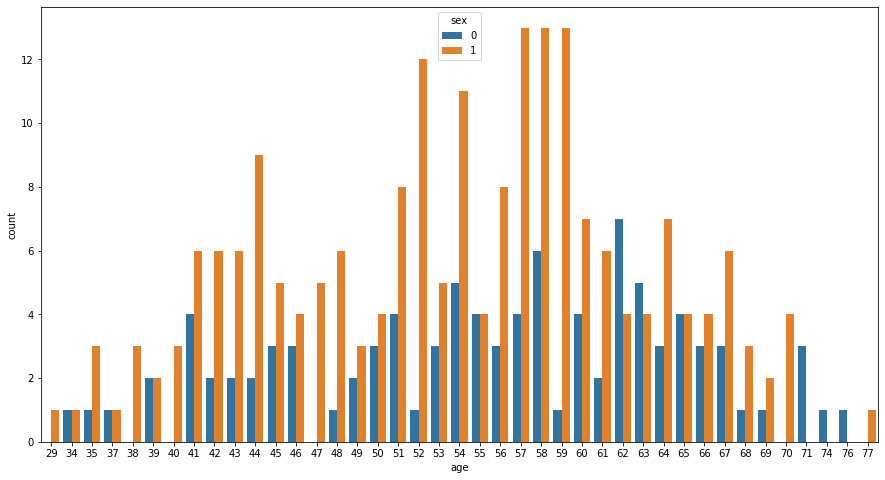

In [9]:
plt.figure(figsize=(15,8))
sns.countplot(x='age',hue='sex',data=data)

Most of the males ages are between 40-67
Most of the females ages are between 50-70


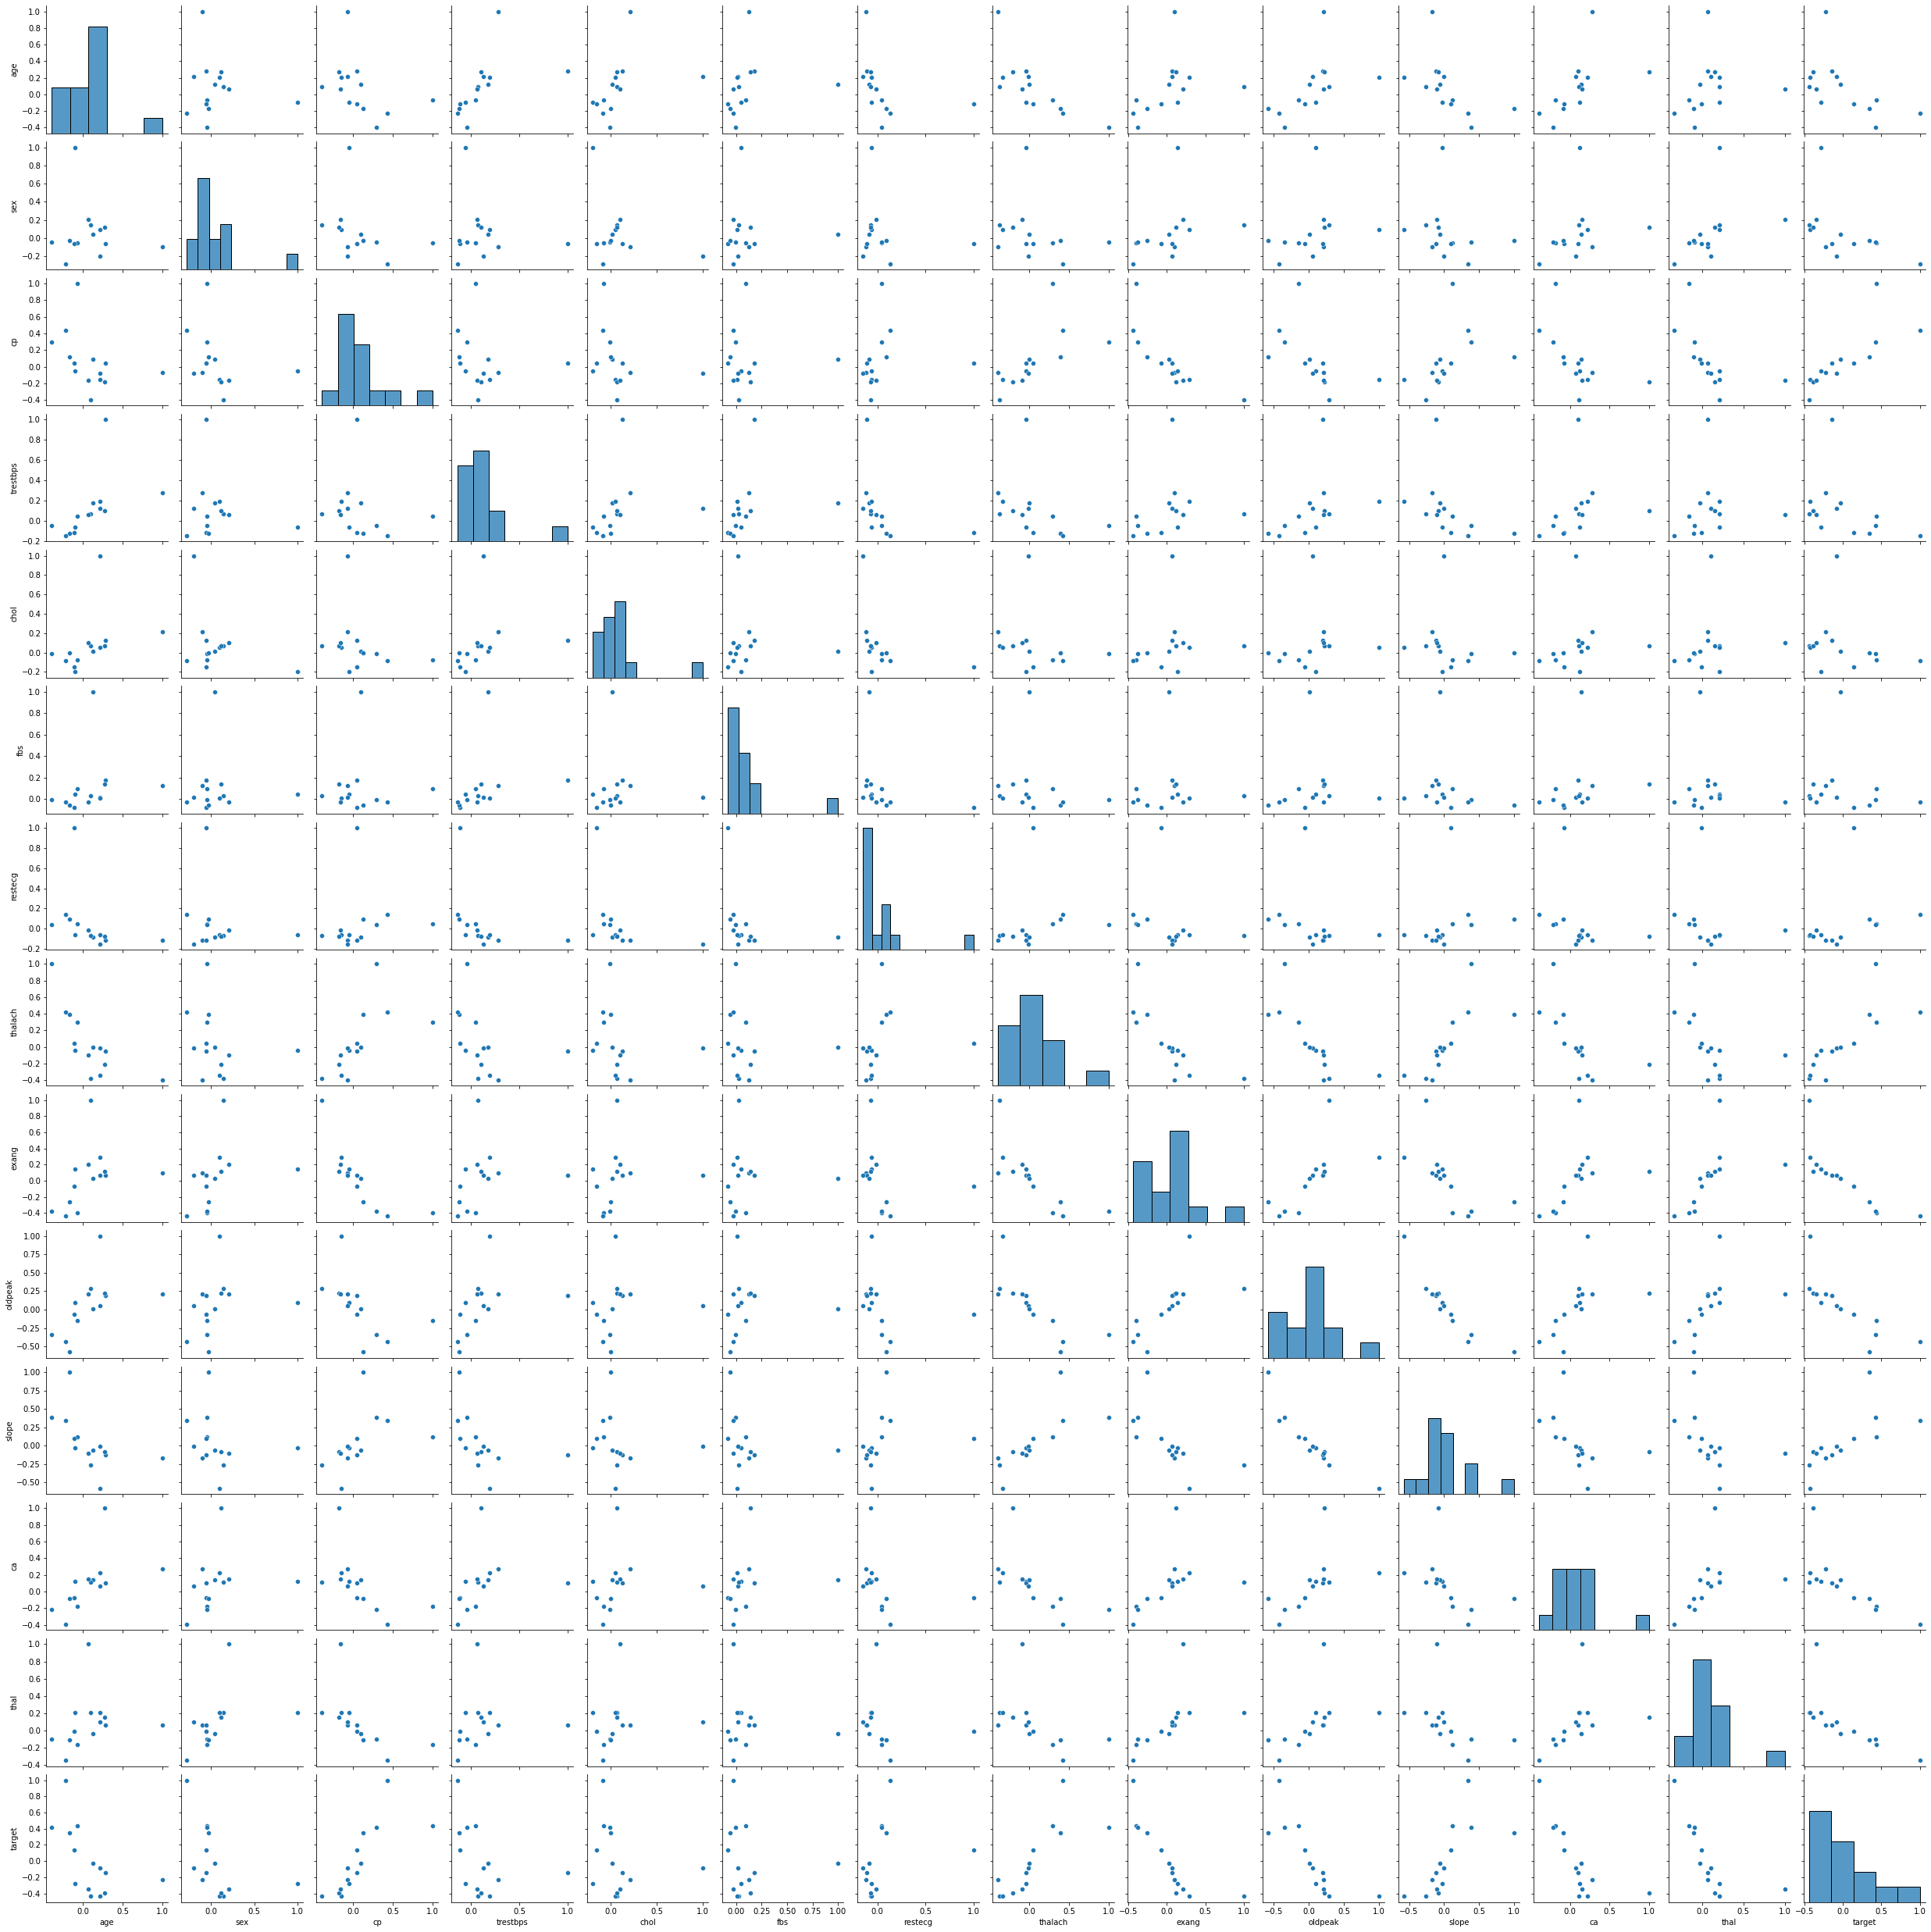

In [10]:
corr=data.corr()
sns.pairplot(corr)

<AxesSubplot:>

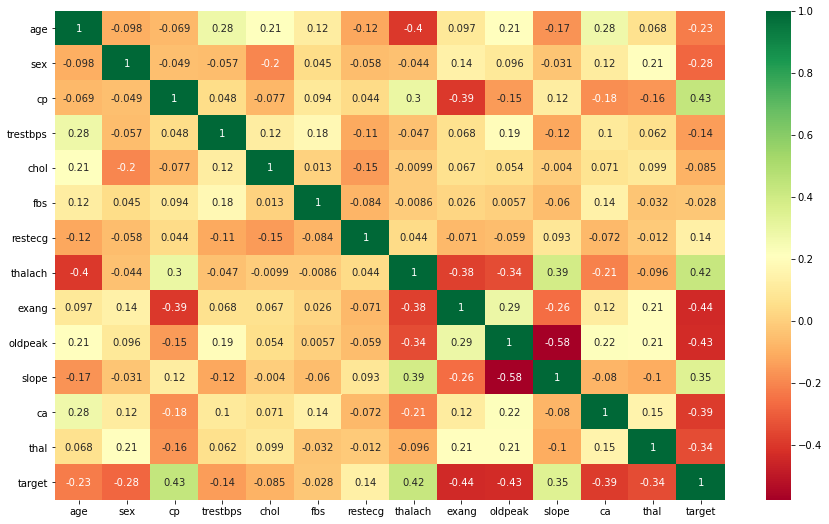

In [11]:
plt.figure(figsize=(15,9))
sns.heatmap(corr,cmap='RdYlGn',linecolor='black',annot=True)

CP,THALACH,SLOPE are positively correlated to target & exang,oldpeak are negatively correlated to it. 

In [12]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [13]:
col={'oldpeak':int}

In [14]:
data=data.fillna(0).astype(col)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       303 non-null    int64
 1   sex       303 non-null    int64
 2   cp        303 non-null    int64
 3   trestbps  303 non-null    int64
 4   chol      303 non-null    int64
 5   fbs       303 non-null    int64
 6   restecg   303 non-null    int64
 7   thalach   303 non-null    int64
 8   exang     303 non-null    int64
 9   oldpeak   303 non-null    int32
 10  slope     303 non-null    int64
 11  ca        303 non-null    int64
 12  thal      303 non-null    int64
 13  target    303 non-null    int64
dtypes: int32(1), int64(13)
memory usage: 32.1 KB


In [16]:
x=data.drop('target',axis=1)
y=data.target

In [17]:
x.shape

(303, 13)

In [18]:
y.shape

(303,)

[0.07365878 0.05466421 0.13483911 0.06422962 0.0584629  0.02017019
 0.03709333 0.08188045 0.08964831 0.08022003 0.07372223 0.12751285
 0.10389798]


<AxesSubplot:>

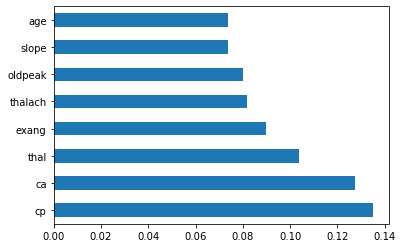

In [19]:
#Feature Importance
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_)
feature_imp=pd.Series(model.feature_importances_,index=x.columns)
feature_imp.nlargest(8).plot(kind='barh')

In [20]:
x.shape


(303, 13)

In [21]:
y.shape

(303,)

In [44]:
from sklearn.model_selection import cross_val_score


In [23]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

In [45]:
forest_scores=[]
for i in range(10,101,10):
    forest_classifier=RandomForestClassifier(n_estimators=i)
    cvs_scores=cross_val_score(forest_classifier,x,y,cv=5)
    forest_scores.append(round(cvs_scores.mean(),3))
    
    

Text(0.5, 1.0, 'Random Forest Classifier scores for different N values')

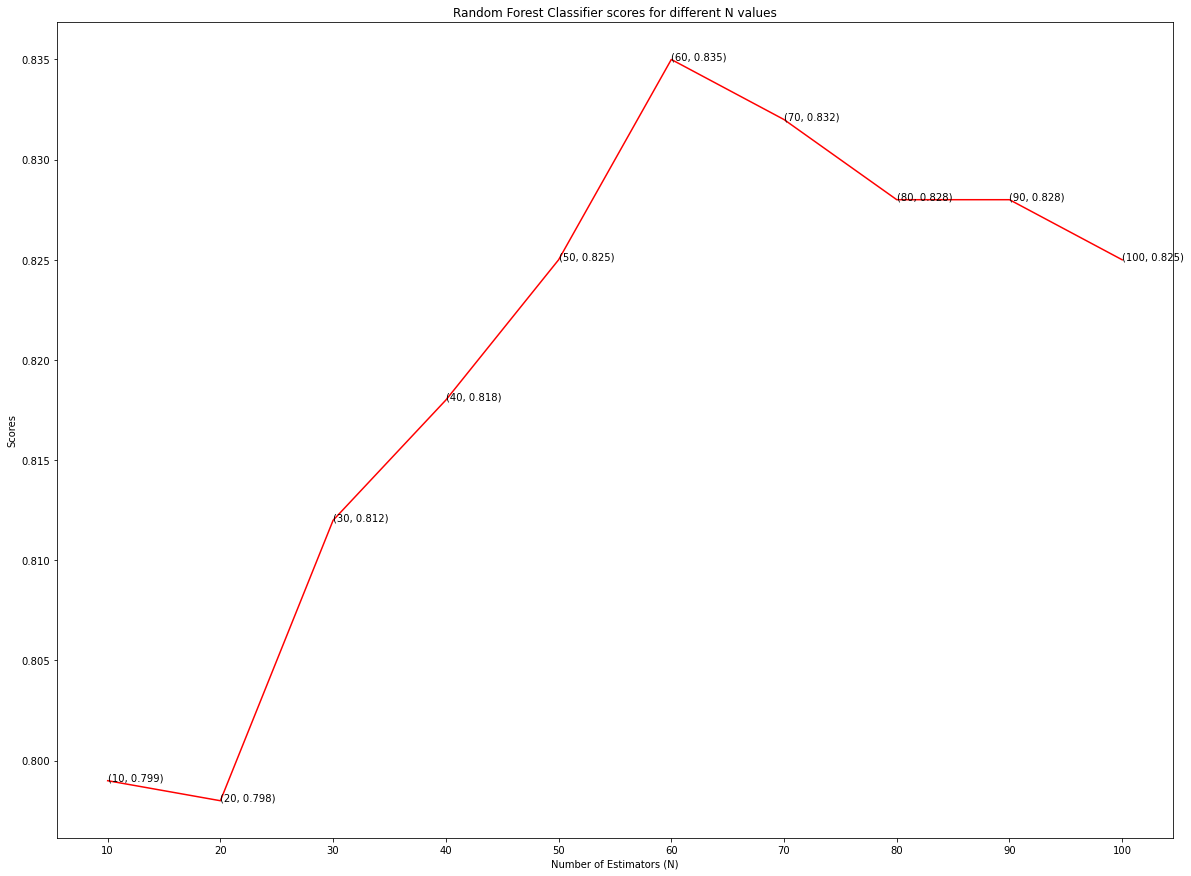

In [46]:
# Plotting the results of forest_scores
plt.figure(figsize=(20,15))
plt.plot([n for n in range(10, 101, 10)], forest_scores, color = 'red')
for i in range(1,11):
    plt.text(i*10, forest_scores[i-1], (i*10, forest_scores[i-1]))
plt.xticks([i for i in range(10, 101, 10)])
plt.xlabel('Number of Estimators (N)')
plt.ylabel('Scores')
plt.title('Random Forest Classifier scores for different N values')

In [47]:
# Training the random forest classifier model with n value as 60
forest_classifier = RandomForestClassifier(n_estimators=60)
cvs_scores = cross_val_score(forest_classifier, x, y, cv=5)
print("Random Forest Classifier Accuracy with n_estimators=60 is: {}%".format(round(cvs_scores.mean(), 4)*100))

Random Forest Classifier Accuracy with n_estimators=60 is: 82.17%


In [48]:
# Importing essential libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [80]:
# Finding the best accuracy for knn algorithm using cross_val_score 
knn_scores = []
for i in range(1, 21):
  knn_classifier = KNeighborsClassifier(n_neighbors=i)
  cvs_scores = cross_val_score(knn_classifier, x, y, cv=7)
  knn_scores.append(round(cvs_scores.mean(),3))

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

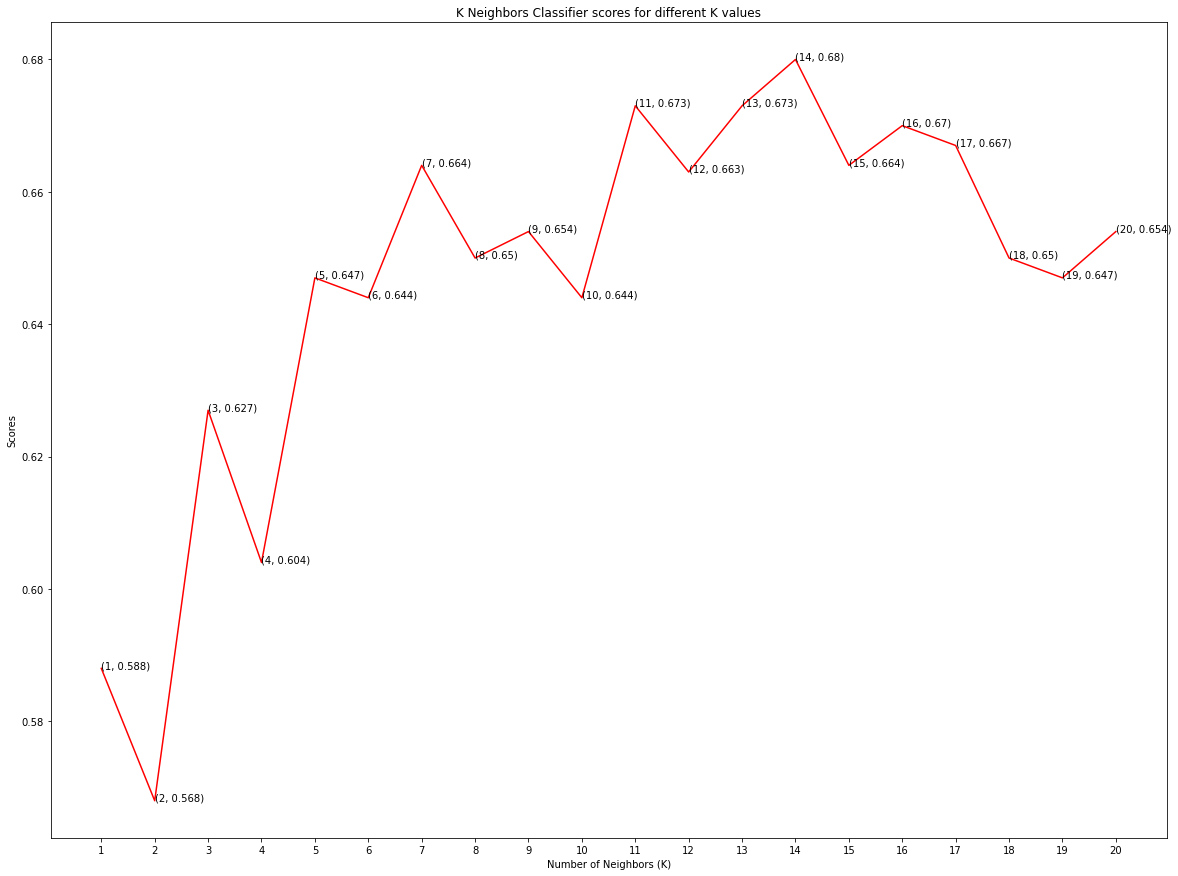

In [81]:
# Plotting the results of knn_scores
plt.figure(figsize=(20,15))
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [82]:
# Training the knn classifier model with k value as 14
knn_classifier = KNeighborsClassifier(n_neighbors=14)
cvs_scores = cross_val_score(knn_classifier, x, y, cv=7)
print("KNeighbours Classifier Accuracy with K=12 is: {}%".format(round(cvs_scores.mean(), 4)*100))

KNeighbours Classifier Accuracy with K=12 is: 68.01%


In [83]:
# Importing essential libraries
from sklearn.tree import DecisionTreeClassifier

In [93]:
# Finding the best accuracy for decision tree algorithm using cross_val_score 
decision_scores = []
for i in range(1, 11):
  decision_classifier = DecisionTreeClassifier(max_depth=i)
  cvs_scores = cross_val_score(decision_classifier, x, y, cv=15)
  decision_scores.append(round(cvs_scores.mean(),3))

Text(0.5, 1.0, 'Decision Tree Classifier scores for different depth values')

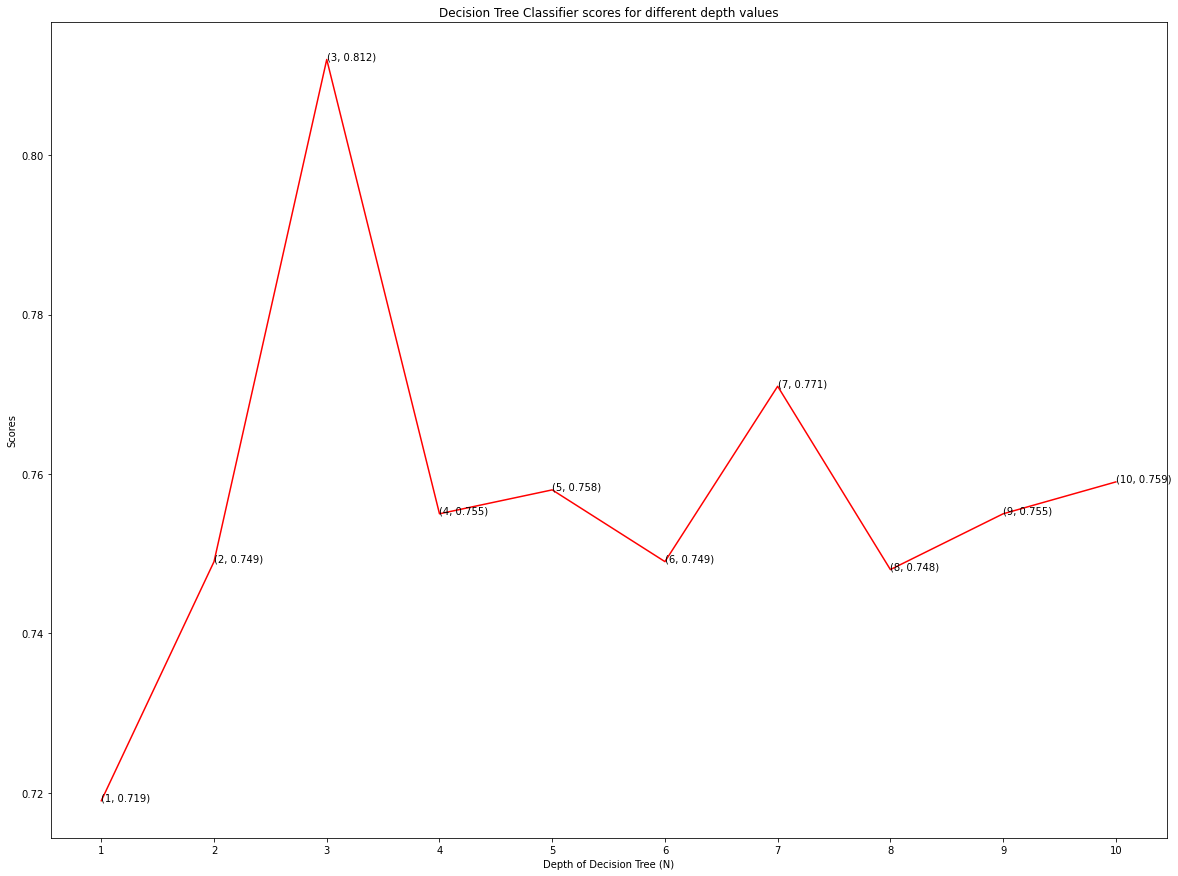

In [94]:
# Plotting the results of decision_scores
plt.figure(figsize=(20,15))
plt.plot([i for i in range(1, 11)], decision_scores, color = 'red')
for i in range(1,11):
    plt.text(i, decision_scores[i-1], (i, decision_scores[i-1]))
plt.xticks([i for i in range(1, 11)])
plt.xlabel('Depth of Decision Tree (N)')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different depth values')


In [95]:
# Training the decision tree classifier model with max_depth value as 3
decision_classifier = DecisionTreeClassifier(max_depth=3)
cvs_scores = cross_val_score(decision_classifier, x, y, cv=15)
print("Decision Tree Classifier Accuracy with max_depth=3 is: {}%".format(round(cvs_scores.mean(), 4)*100))

Decision Tree Classifier Accuracy with max_depth=3 is: 80.83%
